# **Import Data**

In [756]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier

In [757]:
from google.colab import drive
drive.mount('/content/drive')

#Training data menggunakan segmentasi sebelumnya
file_path = "/content/drive/MyDrive/Project Portofolio/Customer Segmentation/Train.csv"
df = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [758]:
df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


#**Exploratory Data Analysis (EDA)**

In [759]:
df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


In [760]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [761]:
df["Segmentation"].value_counts()

,count
Segmentation,
D,2268
A,1972
C,1970
B,1858


In [762]:
df.isnull().sum()

,0
ID,0
Gender,0
Ever_Married,140
Age,0
Graduated,78
Profession,124
Work_Experience,829
Spending_Score,0
Family_Size,335
Var_1,76


In [763]:
df.nunique()

,0
ID,8068
Gender,2
Ever_Married,2
Age,67
Graduated,2
Profession,9
Work_Experience,15
Spending_Score,3
Family_Size,9
Var_1,7


In [764]:
df.describe()

,ID,Age,Work_Experience,Family_Size
count,8068.000000,8068.000000,7239.000000,7733.000000
mean,463479.214551,43.466906,2.641663,2.850123
std,2595.381232,16.711696,3.406763,1.531413
min,458982.000000,18.000000,0.000000,1.000000
25%,461240.750000,30.000000,0.000000,2.000000
50%,463472.500000,40.000000,1.000000,3.000000
75%,465744.250000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


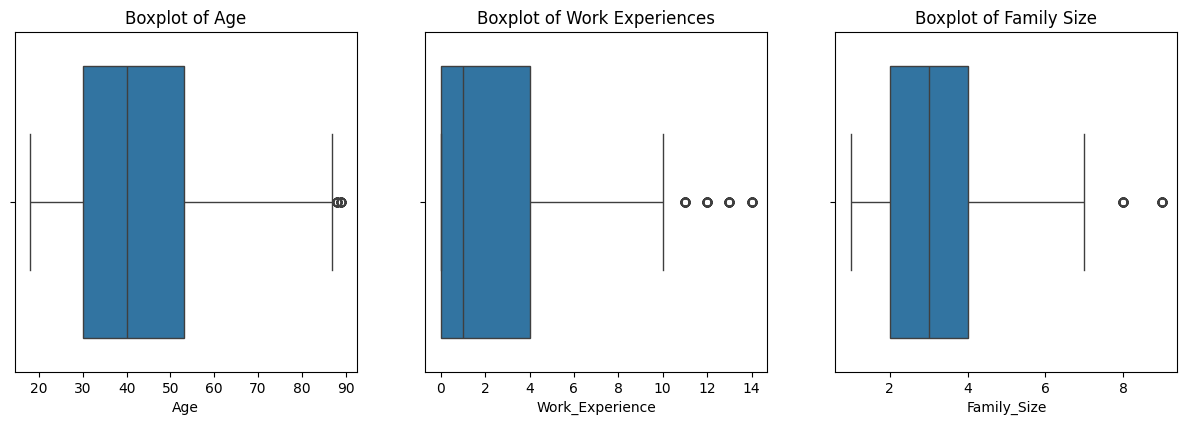

In [765]:
plt.figure(figsize = (15, 15))

plt.subplot(3,3,1)
sns.boxplot(x = df["Age"])
plt.title("Boxplot of Age")

plt.subplot(3,3,2)
sns.boxplot(x = df["Work_Experience"])
plt.title("Boxplot of Work Experiences")

plt.subplot(3,3,3)
sns.boxplot(x = df["Family_Size"])
plt.title("Boxplot of Family Size")

plt.show()

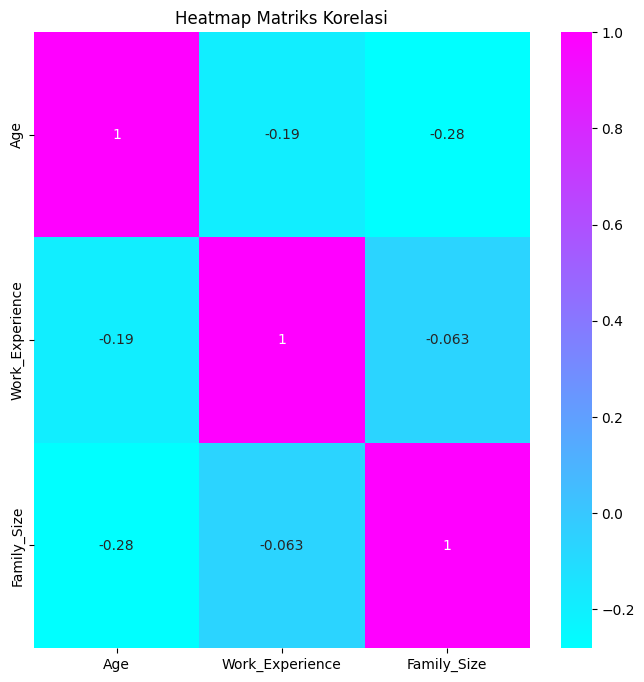

In [766]:
select = df[["Age", "Work_Experience", "Family_Size"]]
correlation_matrix = select.corr()

plt.figure(figsize = (8,8))
sns.heatmap(correlation_matrix, annot = True, cmap = 'cool')
plt.title("Heatmap Matriks Korelasi")
plt.show()

# **Pre Processing**

In [767]:
df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


In [768]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [769]:
# df_clean = df.dropna()

In [770]:
# df_clean.isnull().sum()

In [771]:
df.fillna({"Ever_Married": df["Ever_Married"].mode()[0],
           "Graduated": df["Graduated"].mode()[0],
           "Profession": "Unknown",
           "Var_1": "Unknown"}, inplace=True)

In [772]:
df.fillna({"Work_Experience": df["Work_Experience"].mean(),
           "Family_Size": df["Family_Size"].mean()}, inplace = True)

In [773]:
df.isnull().sum()

,0
ID,0
Gender,0
Ever_Married,0
Age,0
Graduated,0
Profession,0
Work_Experience,0
Spending_Score,0
Family_Size,0
Var_1,0


In [774]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
cols_to_encode = ["Gender", "Ever_Married", "Graduated", "Var_1"]
df[cols_to_encode] = df[cols_to_encode].apply(lambda col: LabelEncoder().fit_transform(col))

In [775]:
spending_mapping = {
    "Low": 0,
    "Average": 1,
    "High": 2
}

df["Spending_Score"] = df["Spending_Score"].map(spending_mapping)

In [776]:
df = pd.get_dummies(df, columns=["Profession"], dtype = int)

In [777]:
df

,ID,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Profession_Unknown
0,462809,1,0,22,0,1.000000,0,4.0,3,D,0,0,0,0,0,1,0,0,0,0
1,462643,0,1,38,1,2.641663,1,3.0,3,A,0,0,1,0,0,0,0,0,0,0
2,466315,0,1,67,1,1.000000,0,1.0,5,B,0,0,1,0,0,0,0,0,0,0
3,461735,1,1,67,1,0.000000,2,2.0,5,B,0,0,0,0,0,0,0,1,0,0
4,462669,0,1,40,1,2.641663,2,6.0,5,A,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,1,0,22,0,0.000000,0,7.0,0,D,0,0,0,0,0,0,0,0,0,1
8064,464685,1,0,35,0,3.000000,0,4.0,3,D,0,0,0,0,1,0,0,0,0,0
8065,465406,0,0,33,1,1.000000,0,1.0,5,D,0,0,0,0,0,1,0,0,0,0
8066,467299,0,0,27,1,1.000000,0,4.0,5,B,0,0,0,0,0,1,0,0,0,0


In [778]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        8068 non-null   int64  
 1   Gender                    8068 non-null   int64  
 2   Ever_Married              8068 non-null   int64  
 3   Age                       8068 non-null   int64  
 4   Graduated                 8068 non-null   int64  
 5   Work_Experience           8068 non-null   float64
 6   Spending_Score            8068 non-null   int64  
 7   Family_Size               8068 non-null   float64
 8   Var_1                     8068 non-null   int64  
 9   Segmentation              8068 non-null   object 
 10  Profession_Artist         8068 non-null   int64  
 11  Profession_Doctor         8068 non-null   int64  
 12  Profession_Engineer       8068 non-null   int64  
 13  Profession_Entertainment  8068 non-null   int64  
 14  Professi

# **Splitting Data**

In [779]:
x = df.drop(columns=["ID", "Segmentation"])
y = df["Segmentation"]

#Splitting Data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42, stratify = y)

In [780]:
# pip install imbalanced-learn

In [781]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [782]:
print("Distribusi sebelum SMOTE:", Counter(y_train))

# Terapkan SMOTE
smote = SMOTE(random_state=42)
x_train_re, y_train_re = smote.fit_resample(x_train, y_train)
print("Distribusi setelah SMOTE:", Counter(y_train_re))

Distribusi sebelum SMOTE: Counter({'D': 1814, 'A': 1578, 'C': 1576, 'B': 1486})
Distribusi setelah SMOTE: Counter({'A': 1814, 'B': 1814, 'C': 1814, 'D': 1814})


In [783]:
#Scaling data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_re)
x_test_scaled = scaler.transform(x_test)

# **Modelling**

### **Model SVM**

In [784]:
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state = 42)
svm_model.fit(x_train_scaled, y_train_re)
pred = svm_model.predict(x_test_scaled)

#Evaluasi Model
print(accuracy_score(y_test, pred))
print("==================")
print(classification_report(y_test, pred))

0.5328376703841388
              precision    recall  f1-score   support

           A       0.43      0.43      0.43       394
           B       0.44      0.39      0.41       372
           C       0.58      0.53      0.55       394
           D       0.63      0.74      0.68       454

    accuracy                           0.53      1614
   macro avg       0.52      0.52      0.52      1614
weighted avg       0.53      0.53      0.53      1614



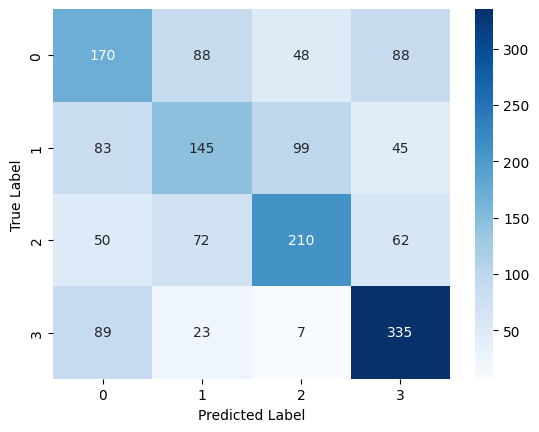

In [785]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### **Model KNN**

In [786]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train_scaled, y_train_re)
pred1 = knn_model.predict(x_test_scaled)

#Evaluasi
print(accuracy_score(y_test, pred1))
print("================================")
print(classification_report(y_test, pred1))

0.4752168525402726
              precision    recall  f1-score   support

           A       0.39      0.47      0.42       394
           B       0.31      0.32      0.32       372
           C       0.54      0.50      0.52       394
           D       0.68      0.59      0.63       454

    accuracy                           0.48      1614
   macro avg       0.48      0.47      0.47      1614
weighted avg       0.49      0.48      0.48      1614



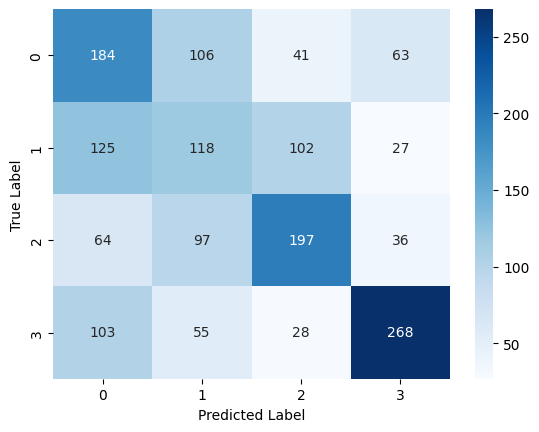

In [787]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, pred1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### **Model Naive Bayes**

In [788]:
from sklearn.naive_bayes import GaussianNB

# Inisialisasi model Naïve Bayes
nb_model = GaussianNB()
nb_model.fit(x_train_re, y_train_re)

# Prediksi
y_pred_nb = nb_model.predict(x_test)
# Evaluasi
print("Naïve Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

Naïve Bayes Accuracy: 0.4653035935563817
              precision    recall  f1-score   support

           A       0.36      0.36      0.36       394
           B       0.29      0.11      0.16       372
           C       0.43      0.69      0.53       394
           D       0.66      0.65      0.66       454

    accuracy                           0.47      1614
   macro avg       0.44      0.45      0.43      1614
weighted avg       0.45      0.47      0.44      1614



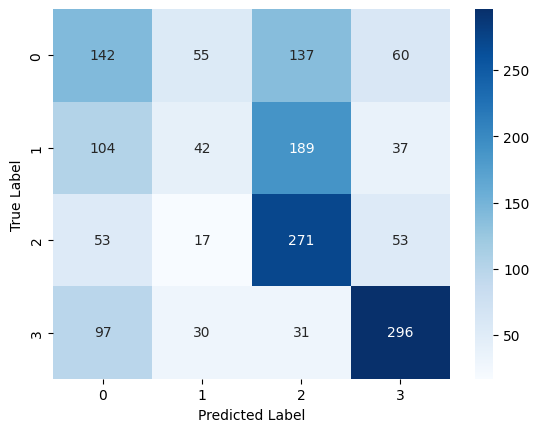

In [789]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# **Test Model dengan Data Baru**

## **Import Data**

In [790]:
file_path_new = "/content/drive/MyDrive/Project Portofolio/Customer Segmentation/Test.csv"
df_new = pd.read_csv(file_path_new)
df_new

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6,B
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6,A
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6,A
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6,B
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
2622,467954,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6,B
2623,467958,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6,A
2624,467960,Female,No,53,Yes,Entertainment,NaN,Low,2.0,Cat_6,C
2625,467961,Male,Yes,47,Yes,Executive,1.0,High,5.0,Cat_4,C


In [791]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2627 non-null   int64  
 1   Gender           2627 non-null   object 
 2   Ever_Married     2577 non-null   object 
 3   Age              2627 non-null   int64  
 4   Graduated        2603 non-null   object 
 5   Profession       2589 non-null   object 
 6   Work_Experience  2358 non-null   float64
 7   Spending_Score   2627 non-null   object 
 8   Family_Size      2514 non-null   float64
 9   Var_1            2595 non-null   object 
 10  Segmentation     2627 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 225.9+ KB


In [792]:
df_new.isnull().sum()

,0
ID,0
Gender,0
Ever_Married,50
Age,0
Graduated,24
Profession,38
Work_Experience,269
Spending_Score,0
Family_Size,113
Var_1,32


## **EDA dan Pre Processing**

In [793]:
df_new.fillna({"Ever_Married": df_new["Ever_Married"].mode()[0],
               "Graduated": df_new["Graduated"].mode()[0],
               "Profession": "Unknown",
               "Var_1": "Unknown"}, inplace = True)

In [794]:
df_new.fillna({"Work_Experience" : df_new["Work_Experience"].mean(),
               "Family_Size" : df_new["Family_Size"].mean()}, inplace = True)

In [795]:
df_new.isnull().sum()

,0
ID,0
Gender,0
Ever_Married,0
Age,0
Graduated,0
Profession,0
Work_Experience,0
Spending_Score,0
Family_Size,0
Var_1,0


In [796]:
label_encoder = LabelEncoder()
columns = ["Gender", "Ever_Married", "Graduated", "Var_1"]
df_new[columns] = df_new[columns].apply(lambda col: LabelEncoder().fit_transform(col))

In [797]:
spending_mapping = {
    "Low": 0,
    "Average": 1,
    "High": 2
}

df_new["Spending_Score"] = df_new["Spending_Score"].map(spending_mapping)

In [798]:
df_new = pd.get_dummies(df_new, columns = ["Profession"], dtype=int)

## **Splitting Data**

In [799]:
x_new = df_new.drop(columns=["ID", "Segmentation"])
y_new = df_new["Segmentation"]

scaler = StandardScaler()
x_new_scaled = scaler.fit_transform(x_new)

## **Pemodelan**

### **Model SVM**

In [800]:
#Model SVM
prediction_svm = svm_model.predict(x_new_scaled)
print("Accuracy:", accuracy_score(y_new, prediction_svm))
print("================================")
print(classification_report(y_new, prediction_svm))

Accuracy: 0.3338408831366578
              precision    recall  f1-score   support

           A       0.36      0.28      0.32       846
           B       0.27      0.28      0.28       550
           C       0.26      0.31      0.29       472
           D       0.41      0.44      0.42       759

    accuracy                           0.33      2627
   macro avg       0.32      0.33      0.33      2627
weighted avg       0.34      0.33      0.33      2627



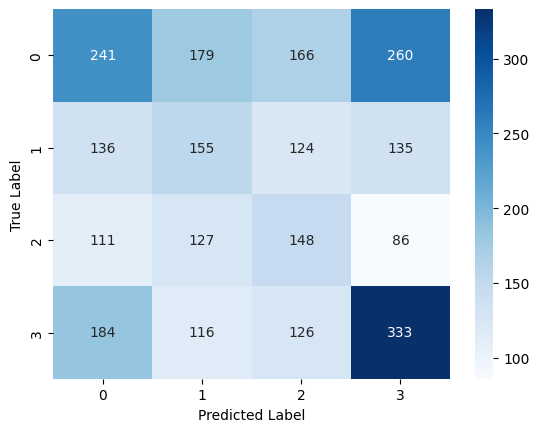

In [801]:
cm = confusion_matrix(y_new, prediction_svm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### **Model KNN**

In [802]:
#Model KNN
prediction_knn = knn_model.predict(x_new_scaled)
print("Accuracy:", accuracy_score(y_new, prediction_knn))
print("================================")
print(classification_report(y_new, prediction_knn))

Accuracy: 0.30681385610963074
              precision    recall  f1-score   support

           A       0.33      0.31      0.32       846
           B       0.23      0.27      0.25       550
           C       0.23      0.28      0.25       472
           D       0.43      0.35      0.39       759

    accuracy                           0.31      2627
   macro avg       0.30      0.30      0.30      2627
weighted avg       0.32      0.31      0.31      2627



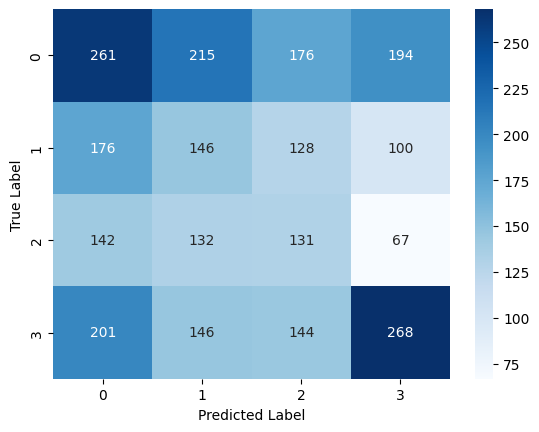

In [803]:
cm = confusion_matrix(y_new, prediction_knn)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### **Model Naive Bayes**

In [804]:
#Model Naive Bayes
prediction_naive = nb_model.predict(x_new_scaled)
print("Accuracy:", accuracy_score(y_new, prediction_naive))
print("================================")
print(classification_report(y_new, prediction_naive))

Accuracy: 0.3418347925390179
              precision    recall  f1-score   support

           A       0.33      0.66      0.44       846
           B       0.22      0.10      0.13       550
           C       0.00      0.00      0.00       472
           D       0.41      0.38      0.40       759

    accuracy                           0.34      2627
   macro avg       0.24      0.28      0.24      2627
weighted avg       0.27      0.34      0.28      2627



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted s

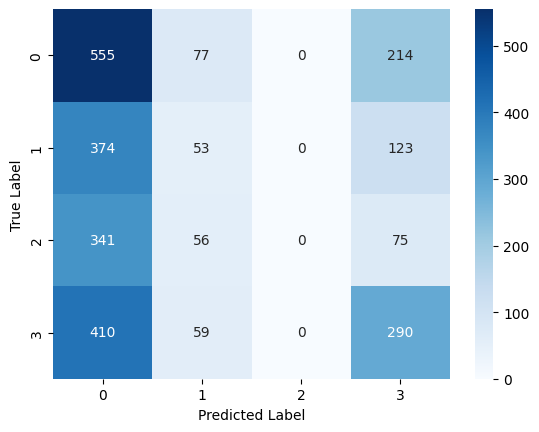

In [805]:
cm = confusion_matrix(y_new, prediction_naive)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()